# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

#  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from keras import models
from keras import layers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


UsageError: Line magic function `%lst` not found.


In [ ]:
concrete_data = pd.read_csv('/content/drive/MyDrive/Deep_learning_assignment/compresive_strength_concrete.csv')

In [ ]:
concrete_data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


<b> Streamlining column names 

In [ ]:
req_col_names = ["Cement", "BlastFurnaceSlag", "FlyAsh", "Water", "Superplasticizer",
                 "CoarseAggregate", "FineAggregate", "Age", "CC_Strength"]
curr_col_names = list(concrete_data.columns)
curr_col_names
mapper = {}
for i,name in enumerate(curr_col_names):
    mapper[name] = req_col_names[i]
  
    
concrete_data = concrete_data.rename(columns = mapper)

In [ ]:
concrete_data.head(10)

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CC_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [ ]:
min_d = concrete_data.min()
max_d = concrete_data.max()
diff = max_d - min_d
normalized_df=(concrete_data - min_d)/ diff
normalized_df.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CC_Strength
0,1.000000,0.000000,0.0,0.321086,0.07764,0.694767,0.205720,0.074176,0.967485
1,1.000000,0.000000,0.0,0.321086,0.07764,0.738372,0.205720,0.074176,0.741996
2,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.000000,0.739011,0.472655
3,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.000000,1.000000,0.482372
4,0.220548,0.368392,0.0,0.560703,0.00000,0.515698,0.580783,0.986264,0.522860


In [ ]:
test_d = normalized_df.sample(frac=0.3, random_state=1337)
train_d = normalized_df.drop(test_d.index)

In [ ]:
train_data = train_d.iloc[:,:-1]
train_label = train_d.iloc[:,-1]

In [ ]:
test_data = test_d.iloc[:,:-1]
test_label = test_d.iloc[:,-1]

In [ ]:
print(train_data.shape)
print(train_label.shape)

print(test_data.shape)
print(test_label.shape)

(721, 8)
(721,)
(309, 8)
(309,)


In [ ]:
train_data = train_data.to_numpy()
test_data = test_data.to_numpy()

In [ ]:
test_labels= np.array(test_label.astype('float32'))
train_labels= np.array(train_label.astype('float32'))

In [ ]:
train_labels.shape

(721,)

In [ ]:
def build_model(act):
  model = models.Sequential()
  model.add(layers.Dense(10, activation= act,input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(8, activation= act))
  model.add(layers.Dense(6, activation= act))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [ ]:
build_model('relu').summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                90        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 239
Trainable params: 239
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = build_model('relu')
history = model.fit(train_data, train_labels,epochs= 100, batch_size=1, validation_split=0.3)

Epoch 1/100
504/504 [==============================] - 2s 2ms/step - loss: 0.1313 - mae: 0.2888 - val_loss: 0.0296 - val_mae: 0.1378
Epoch 2/100
504/504 [==============================] - 1s 1ms/step - loss: 0.0318 - mae: 0.1432 - val_loss: 0.0236 - val_mae: 0.1213
Epoch 3/100
504/504 [==============================] - 1s 1ms/step - loss: 0.0247 - mae: 0.1262 - val_loss: 0.0239 - val_mae: 0.1208
Epoch 4/100
504/504 [==============================] - 1s 1ms/step - loss: 0.0190 - mae: 0.1062 - val_loss: 0.0234 - val_mae: 0.1183
Epoch 5/100
504/504 [==============================] - 1s 1ms/step - loss: 0.0164 - mae: 0.0969 - val_loss: 0.0218 - val_mae: 0.1144
Epoch 6/100
504/504 [==============================] - 1s 1ms/step - loss: 0.0133 - mae: 0.0869 - val_loss: 0.0219 - val_mae: 0.1166
Epoch 7/100
504/504 [==============================] - 1s 1ms/step - loss: 0.0134 - mae: 0.0871 - val_loss: 0.0186 - val_mae: 0.1062
Epoch 8/100
504/504 [==============================] - 1s 1ms/step - 

In [ ]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_labels)

10/10 [==============================] - 0s 2ms/step - loss: 0.0135 - mae: 0.0875


In [ ]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [ ]:
val_mae = history.history['val_mae']
val_loss = history.history['val_loss']

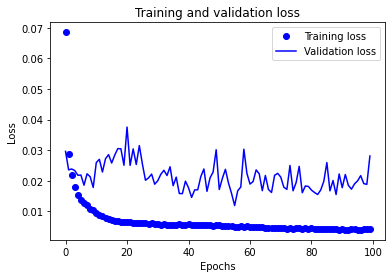

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(len(history_dict['loss']))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

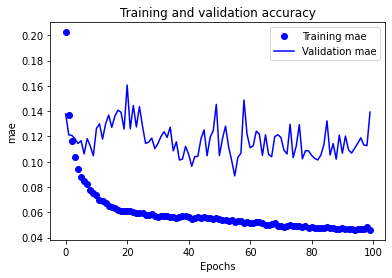

In [ ]:
acc_values = history_dict['mae']
val_acc_values = history_dict['val_mae']
plt.plot(epochs, acc_values, 'bo', label='Training mae')
plt.plot(epochs, val_acc_values, 'b', label='Validation mae')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()
plt.show()

In [ ]:
y_predict = model.predict(test_data)

In [ ]:
mean_label = concrete_data.iloc[:,-1].mean()
std_label = concrete_data.iloc[:,-1].std()

In [ ]:
def denorm(x):
    return (x * std_label) + mean_label

In [ ]:
y_predict = denorm(y_predict)
y_predict = y_predict.flatten()
y_predict.shape

(309,)

In [ ]:
y_true = denorm(test_labels)
y_true = y_true.flatten()
test_labels.shape

(309,)

(0.0, 60.0)

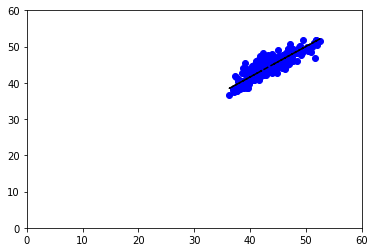

In [ ]:
coef = np.polyfit(y_true,y_predict,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y

plt.plot(y_true, y_predict, 'bo', y_true, poly1d_fn(y_true), '--k')
plt.xlim(0, 60)
plt.ylim(0, 60)